# Data Handling

In [1]:
# Importing 
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading given csv file
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Dropping columns having missing values >= 30% 
_ = []
for i in df.columns:
    if (df[i].isnull().sum()/len(df[i])) < 0.3:
        _.append(i)
df = df[_]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Focusing on columns with missing values
arr = [i for i in df.columns if df[i].isnull().sum() ]

In [10]:
arr

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
df[arr].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [12]:
df.LotFrontage.median()

69.0

(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

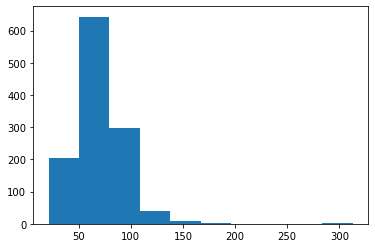

In [13]:
plt.hist(df.LotFrontage)

In [14]:
# Replacing missing values with median
df.LotFrontage.fillna(value=69.0,inplace = True)

In [15]:
df.LotFrontage.value_counts()

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

(array([205., 902., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

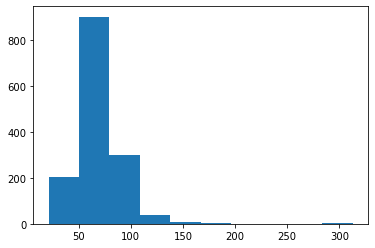

In [16]:
plt.hist(df.LotFrontage)

In [17]:
# All the missing values with garage feature indicating variables have the same number of missing values
for i in ['GarageType', 'GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    print(df[i].isnull().sum())

81
81
81
81
81


In [18]:
# Upon checking all of them have missing values where the garage itself is not applicable/absent
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    print(df[i].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [19]:
# Thus filling "NA" for categorical missing values and -1 for numeric missing values.
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    df[i].fillna(value="NA",inplace=True)

df.GarageYrBlt.fillna(value=-1,inplace=True)


In [20]:
# Cross-checking
for i in ['GarageType', 'GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    print(df[i].isnull().sum())

0
0
0
0
0


In [21]:
for i in ['MasVnrType','MasVnrArea']:
    print(df[i].isnull().sum())

print(df.MasVnrType.value_counts())
print(df.MasVnrArea[df.MasVnrType=="None"])

8
8
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
1       0.0
3       0.0
5       0.0
8       0.0
9       0.0
       ... 
1454    0.0
1455    0.0
1457    0.0
1458    0.0
1459    0.0
Name: MasVnrArea, Length: 864, dtype: float64


In [22]:
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [23]:
# Replacing missing values with respective modes of the columns
df.MasVnrArea.fillna(value=0.0,inplace=True)
df.MasVnrType.fillna(value="None",inplace=True)

In [24]:
# Cross-checking
for i in ['MasVnrType','MasVnrArea']:
    print(df[i].isnull().sum())

0
0


In [25]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
# Replacing missing value with mode
df.Electrical.fillna(value="SBrkr",inplace=True)

In [27]:
df.Electrical.isnull().sum()

0

In [28]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    print(df[i].isnull().sum())

37
37
38
37
38


In [29]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    print(df[i].value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [30]:
# Finding index of missing values in columns 'BsmtExposure' and 'BsmtFinType2' because they have a single extra missing value
print(df[df['BsmtFinType2'].isnull()].index.tolist())
print(df[df['BsmtExposure'].isnull()].index.tolist())

[17, 39, 90, 102, 156, 182, 259, 332, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 948, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]


In [31]:
# Filling mode of the respective columns on the index 17 of columns 'BsmtExposure' and 'BsmtFinType2'
df['BsmtFinType2'].loc[17] = "Unf"
df['BsmtExposure'].loc[17] = "No"

In [32]:
#Cross-checking
print(df['BsmtFinType2'].loc[17])
print(df['BsmtExposure'].loc[17])

Unf
No


In [33]:
# Now all have the same missing value
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    print(df[i].isnull().sum())

# Applying the same logic as done with columns 'GarageType', 'GarageYrBlt','GarageFinish','GarageQual','GarageCond'
# Filling missing values in columns with "NA"
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df[i].fillna(value="NA", inplace=True)

37
37
37
37
37


In [34]:
#Cross-checking
for i in arr:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


# Data Analysis

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [36]:
df.shape

(1460, 76)

In [37]:
df.MSSubClass.head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [38]:
# Converting all numeric values to string as they represent categories rather than the actual numeric value indicated 
df.MSSubClass = df.MSSubClass.apply(lambda x: str(x))

In [39]:
# Dropping column 'Id'
df.drop('Id',axis=1,inplace=True)

In [40]:
# Creating list of numerical columns
num_arr = df.select_dtypes(include = ['float64','int64'])
num_arr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [41]:
num_arr.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
# correlation matrix
co = num_arr.corr()
co

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [43]:
# List of columns having correlation greater than 50%
co_05 = co.SalePrice[co.SalePrice>0.5]
co_05

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

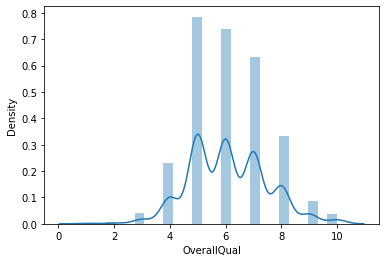

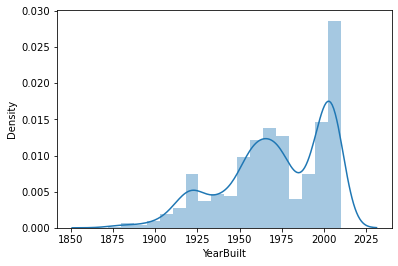

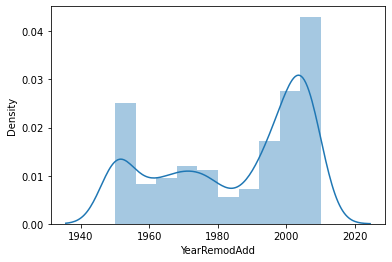

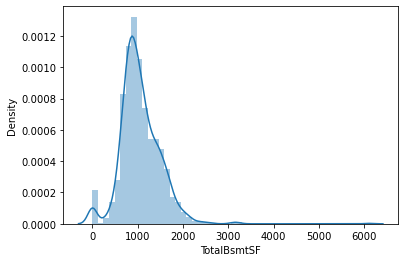

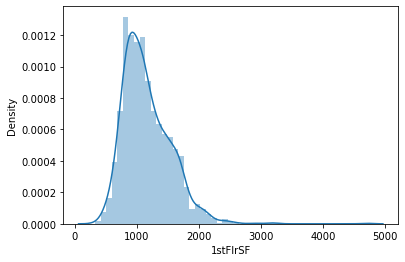

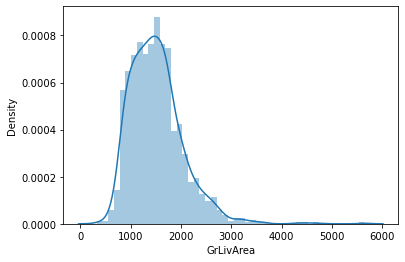

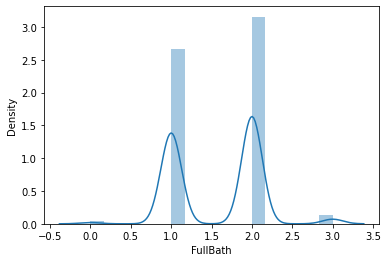

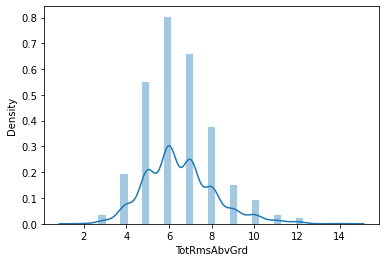

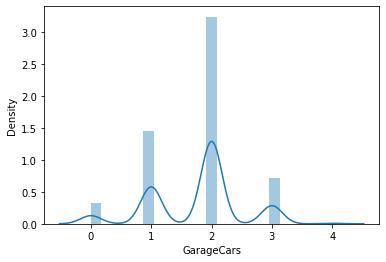

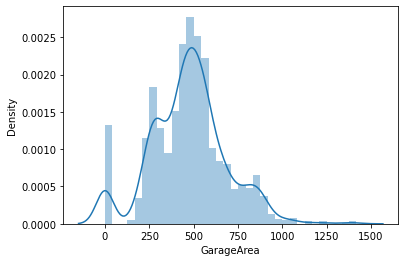

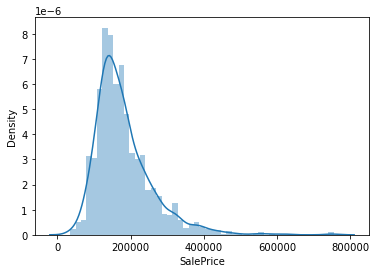

In [44]:
# Distplots 
for i in co_05.index:
    sns.distplot(df[i])
    plt.show()
    

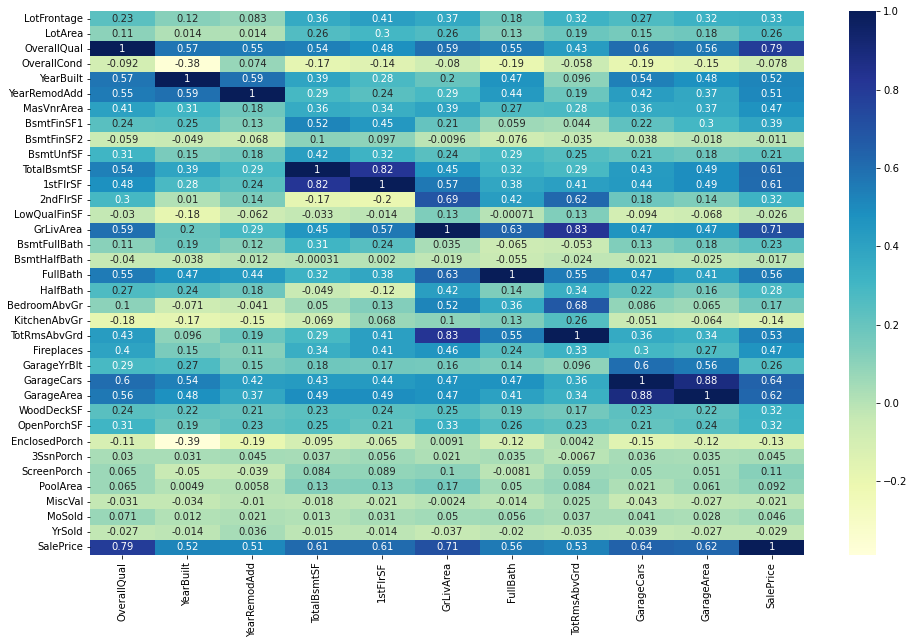

In [45]:
# Heatmap
plt.figure(figsize=(16,10))

sns.heatmap(co[co_05.index],cmap="YlGnBu",annot=True)

plt.show()

In [46]:
# Creating list of categorical columns
cat_arr = df.select_dtypes(include = ['object'])
cat_arr

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


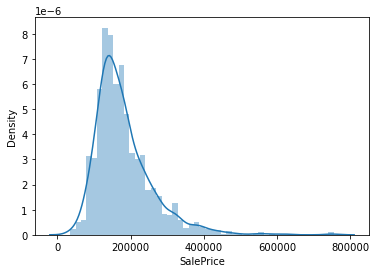

In [47]:
# Analysing target variable : SalePrice
sns.distplot(df.SalePrice)
plt.show()

# Data Preparation

In [48]:
# Seprating the targeting variable from dataframe
y = df.pop('SalePrice')
X = df

In [49]:
# Creating dummy variables for categorical columns
cat_dummies = pd.get_dummies(cat_arr, drop_first = True)
cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
# Dropping categorical columns from X
X.drop(cat_arr.columns, axis=1, inplace=True)

In [51]:
# Concatting dummy variables with X
X = pd.concat([X, cat_dummies], axis=1)

In [52]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Storing column names in cols
cols = X.columns

# Scaling X
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [54]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)


In [55]:
#Checking split shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 254)
(439, 254)
(1021,)
(439,)


# Model Building

In [56]:
# As we have very large number of columns/features (254), thus we will imply RFE to select 100 features for model building
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=100)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [57]:
# Names of features selected by rfe
selected = X_train.columns[rfe.support_]

In [58]:
# Printing selected features
selected

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PoolArea', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Shed',
 

In [59]:
# Creating new test and train variables having selected columns/features.
X_train_1 = X_train[selected]
X_test_1 = X_test[selected]

## Ridge Regression

In [60]:
# List of alphas 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross-validation
# since we have a good amount of data, taking 5 folds only
folds = 5
model_CV = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_CV.fit(X_train_1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best hyperparameter alpha
model_CV.best_params_

{'alpha': 9.0}

In [62]:
# Fitting ridge model for alpha=9.0
ridge = Ridge(alpha=9.0)
ridge.fit(X_train_1,y_train)
list(zip(X_train_1.columns,ridge.coef_))

[('LotFrontage', 569.980219471731),
 ('LotArea', 4671.4163594523225),
 ('OverallQual', 9810.433553542476),
 ('OverallCond', 6088.231274306339),
 ('YearBuilt', 10997.880557437926),
 ('YearRemodAdd', 3258.9084931031516),
 ('MasVnrArea', 3487.169835475857),
 ('BsmtFinSF1', 5579.472919829652),
 ('BsmtFinSF2', 480.55225222564445),
 ('BsmtUnfSF', 1197.7358687975827),
 ('TotalBsmtSF', 7183.749574916653),
 ('1stFlrSF', 7724.77290827676),
 ('2ndFlrSF', 16598.912492848805),
 ('LowQualFinSF', -1122.0140445568056),
 ('GrLivArea', 19368.266322043026),
 ('BsmtFullBath', 2805.655831753234),
 ('BedroomAbvGr', -2314.063438823918),
 ('KitchenAbvGr', -2929.150019544274),
 ('GarageYrBlt', 1453.2993046457577),
 ('GarageCars', 5695.26108234382),
 ('GarageArea', 658.4837369327162),
 ('PoolArea', 1729.5227771330444),
 ('MSSubClass_190', -572.6383017531848),
 ('MSSubClass_20', 4835.813149293437),
 ('MSSubClass_30', 2212.2519921474673),
 ('MSSubClass_60', 5578.406622823271),
 ('MSSubClass_70', 1419.550657222021

In [63]:
# Making predictions on test data using the model
y_test_pred = ridge.predict(X_test_1)

In [64]:
# Evaluating the model on test set results
mse = mean_squared_error(y_test, y_test_pred)
print("MSE = ",mse)

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("RMSE = ",rmse)

r_squared = r2_score(y_test, y_test_pred)
print("R-sqaure = ",r_squared)


MSE =  1060921545.0487
RMSE =  32571.790633133758
R-sqaure =  0.835176977529786


## Lasso Regression

In [65]:
lasso = Lasso()

# creating model with same params and folds
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        cv = folds,
                        scoring  = 'neg_mean_absolute_error',
                        return_train_score = True,
                        verbose = 1)
# Using the whole set of features as LASSO is capable of feature selection
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing best alpha value
model_cv.best_params_

{'alpha': 500}

In [67]:
# Fitting lasso model with alpha = 500
lasso = Lasso(alpha = 500)

lasso.fit(X_train,y_train)

list(zip(X_train.columns,lasso.coef_))

[('LotFrontage', -0.0),
 ('LotArea', 3963.68171117351),
 ('OverallQual', 13232.23451339172),
 ('OverallCond', 4526.895955992952),
 ('YearBuilt', 7096.644993342602),
 ('YearRemodAdd', 3137.590570331121),
 ('MasVnrArea', 3197.1047614016493),
 ('BsmtFinSF1', 2342.590854076536),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 5036.220984164356),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 1143.2921428816514),
 ('LowQualFinSF', -1769.6317742763388),
 ('GrLivArea', 29704.848298660974),
 ('BsmtFullBath', 3062.665534932155),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 1964.555733757092),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -1669.2668721115112),
 ('KitchenAbvGr', -4320.578308369684),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 1234.373798179317),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 6354.596511406394),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 935.5364814548907),
 ('OpenPorchSF', 272.2793423225377),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 447.2382145632848),
 ('ScreenPorch', 509.18672486820395),
 ('

In [68]:
# Lasso regression has selected 137 features out of 254
lasso.coef_[lasso.coef_!=0].size

137

In [69]:
# Making predictions on test set
y_test_pred_1 = lasso.predict(X_test)

In [70]:
# Evaluting model on test set
mse = mean_squared_error(y_test, y_test_pred_1)
print("MSE = ",mse)

rmse = mean_squared_error(y_test, y_test_pred_1, squared = False)
print("RMSE = ",rmse)

r_squared = r2_score(y_test, y_test_pred_1)
print("R-sqaure = ",r_squared)


MSE =  999034881.2494261
RMSE =  31607.51305068822
R-sqaure =  0.8447915876068451
